In [1]:
import mapped as mp
import geopandas as gpd

In [2]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))

Importing `mapped` monkeypatches `geopandas` to add a 
keyword `basemap` to the `geopandas.GeoDataFrame.plot`
function, which adds a contextual background map to plots.  Set to `True` to 
get a default map style from Stamen Design.

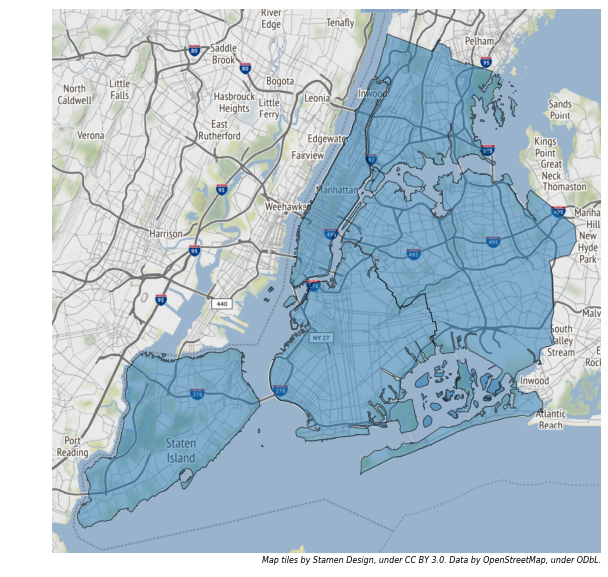

In [3]:
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap=True);

Or set to a string naming a style offered by `contextily` to get other map styles.
See a list of tile providers 
[here](https://github.com/darribas/contextily/blob/master/contextily/tile_providers.py).

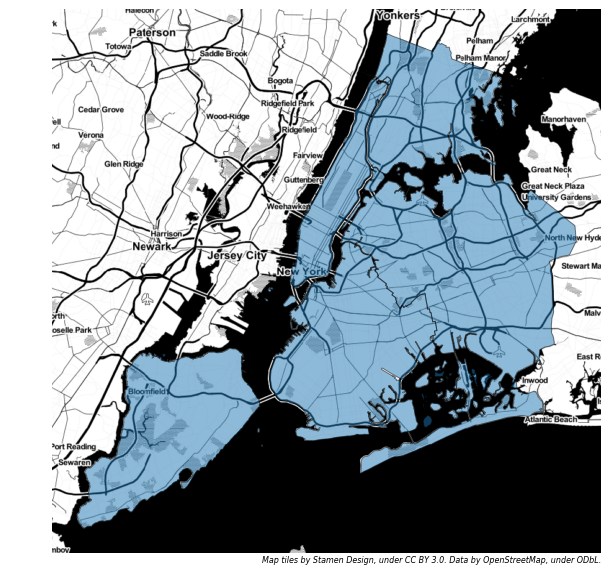

In [4]:
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='ST_TONER');

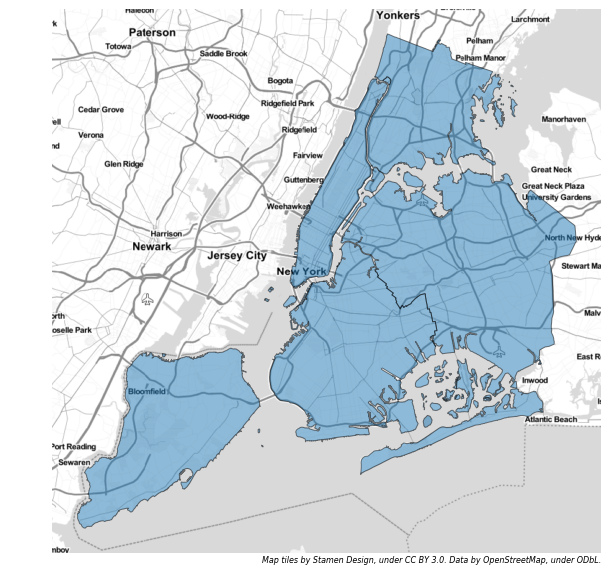

In [5]:
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='ST_TONER_LITE');

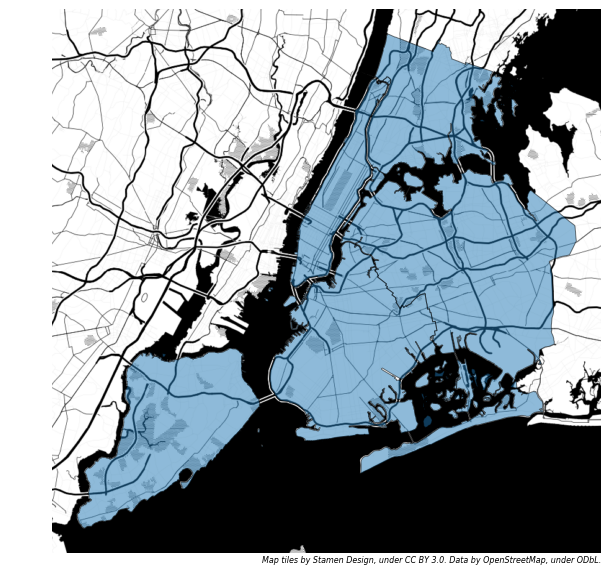

In [6]:
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap='ST_TONER_BACKGROUND');

Note that a coordinate reference system (crs) must be defined on the 
GeoDataFrame if it is not already in Web Mercator (EPSG:3857).  Otherwise,
the map tiles will probably not align correctly and you will get unexpected
results.

In [9]:
df.crs = None

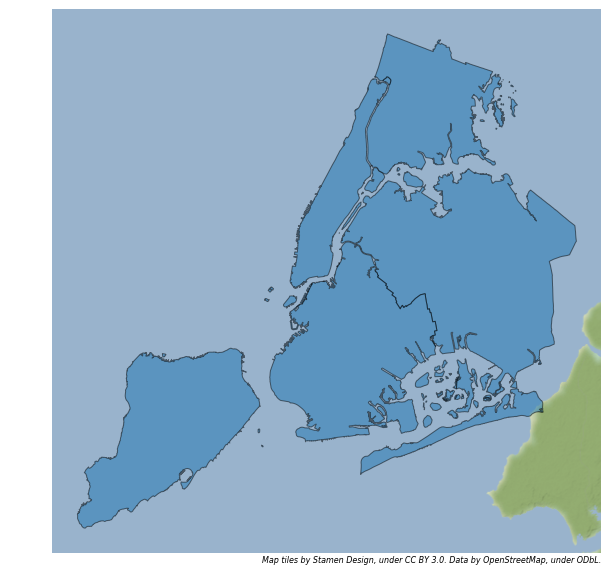

In [10]:
df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', basemap=True);

Mapped also offers a seperate `add_basemap` method to attach a basemap
to an existing matplotlib `AxesSubplot`.

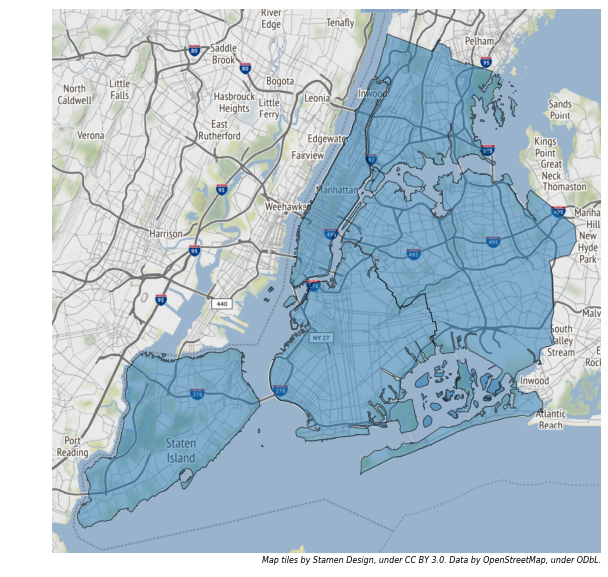

In [11]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
mp.add_basemap(ax, zoom='auto', axis='off', epsg=2263)

In [12]:
mp.add_basemap?

Signature:
mp.add_basemap(
    ax,
    zoom='auto',
    max_tiles=20,
    tiles='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png',
    crs=None,
    epsg=None,
    axis='off',
    figsize=(10, 10),
)
Docstring:
Add a basemap to a matplotlib map plot.

Parameters
----------
ax: AxesSubplot
        The extent of the map is inferred from the axes, and the tiles are
        then rendered onto these axes.
zoom: int, or 'auto'
        The zoom level of the map tiles to download.  Note that this does
        not actually change the magnification of the rendered map, just the size
        and level of detail in the mapping tiles used to render a base map.
        Selecting a zoom level that is too high will result in a large download
        with excessive detail (and unreadably small labels, if labels are included
        in the tiles).
max_tiles: int, default 20
        The maximum number of map tiles to download for this basemap.  Used only
        if `zoom` is 'auto', in which case `z